In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from textblob import TextBlob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
tfidfvect=TfidfVectorizer()
wordnetlemmatizer=WordNetLemmatizer()

### Importing Data:

In [6]:
pd.set_option('display.max_colwidth',None)
data=pd.read_csv('/kaggle/input/chatgpt-sentiment-analysis/file.csv')
data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad


In [7]:
data1=data.copy()
data1.reset_index(drop=True,inplace=True)
data1.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad


### Sentiment Analysis:

In [8]:
# Function for removing emoticons, emojis and other symbols in tweets:
def remove_emojis(text):
    emojis=re.compile('['
                     u'\U0001F600-\U0001F64F'
                     u'\U0001F300-\U0001F5FF'
                     u'\U0001F680-\U0001F6FF'
                     u'\U0001F700-\U0001F77F'
                     u'\U0001F780-\U0001F7FF'
                     u'\U0001F800-\U0001F8FF'
                     u'\U0001F900-\U0001F9FF'
                     u'\U0001FA00-\U0001FA6F'
                     u'\U0001FA70-\U0001FAFF'
                     u'\U0001F004-\U0001F0CF'
                     u'\U0001F170-\U0001F251'
                      ']+', flags=re.UNICODE)
    cleaned_text=emojis.sub('',text)
    return cleaned_text

In [9]:
data1['tweets'][4]

'As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1'

In [10]:
remove_emojis(data1['tweets'][4])

'As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now  https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1'

In [11]:
# Function for cleaning tweets
def clean_text(text):
    cleaned=text.lower()
    cleaned=re.sub(r'https?://\S+',"",cleaned) #finds pattern https:// or http:// and 
                                               #replaces it along with non white space 
                                               #characters present beside it with blank space
    cleaned=re.sub(r'\\n'," ",cleaned) #replaces new line characters with blank space
    cleaned=re.sub(r'[@#!&](\w+)',r' \1',cleaned) # replaces special characters
    cleaned=re.sub(r'[.,\':/;-]',' ',cleaned) # replaces .,: and other characters
    return cleaned

In [12]:
# Tokenizes and Lemmatizes text with word_tokenize and WordNetLemmatizer and returns
# clean text
def tokenize(text):
    cleaned=word_tokenize(text)
    cleaned=[wordnetlemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words('english')]
    cleaned_text=" ".join(cleaned)
    return cleaned_text

In [13]:
# Applying remove_emojis, clean_text functions on individual cell of 'tweets' column
data1['cleaned_text']=data1['tweets'].apply(lambda x:remove_emojis(x))
data1['cleaned_text']=data1['cleaned_text'].apply(lambda x:clean_text(x))

In [14]:
data1.head()

,Unnamed: 0,tweets,labels,cleaned_text
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language models for dialogue openai
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language models for dialogue ai machinelearning datascience artificialintelligence trending ai ml article identified amp digested via granola a machine driven rss bot by ramsey elbasheer
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,as of 2 minutes ago openai released their new chatgpt and you can use it right now


In [15]:
# Tokenizing and Lemmatizing text
tqdm.pandas()
data1['cleaned_text']=data1['cleaned_text'].progress_apply(lambda x:tokenize(x))

100%|██████████| 219294/219294 [11:23<00:00, 320.88it/s]


In [16]:
data1.head()

,Unnamed: 0,tweets,labels,cleaned_text
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language model dialogue openai
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking chatgpt new ai system optimized dialogue feedback help u improve
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language model dialogue ai machinelearning datascience artificialintelligence trending ai ml article identified amp digested via granola machine driven r bot ramsey elbasheer
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled share chatgpt new model optimized dialog public free accessible everyone
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,2 minute ago openai released new chatgpt use right


(-0.5, 799.5, 599.5, -0.5)

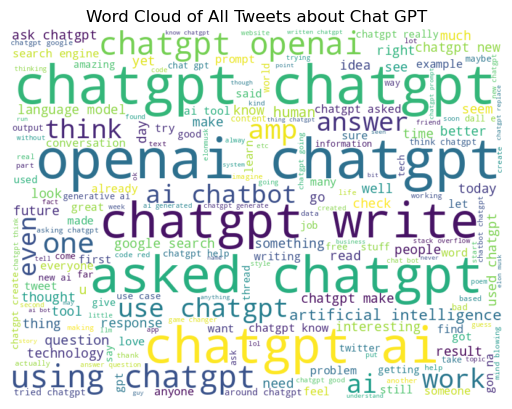

In [17]:
wordcloud=WordCloud(width=800, height=600, background_color='white').generate(" ".join(data1['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of All Tweets about Chat GPT')
plt.axis('off')

In [18]:
good_text=" ".join(data1['cleaned_text'][data1.labels=='good'])
bad_text=" ".join(data1['cleaned_text'][data1.labels=='bad'])
neutral_text=" ".join(data1['cleaned_text'][data1.labels=='neutral'])

(-0.5, 799.5, 599.5, -0.5)

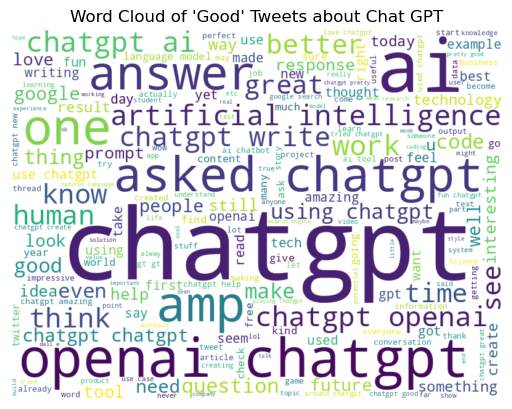

In [43]:
goodwordcloud=WordCloud(width=800, height=600, background_color='white',random_state=42).generate(good_text)
plt.imshow(goodwordcloud, interpolation='bilinear')
plt.title('Word Cloud of \'Good\' Tweets about Chat GPT')
plt.axis('off')

- From the above word cloud, we can see that words like 'answer', 'human', 'aritificial intelligence', 'amazing', 'use', 'time', 'learn', 'work', 'best' are frequently found in the tweets.

(-0.5, 799.5, 599.5, -0.5)

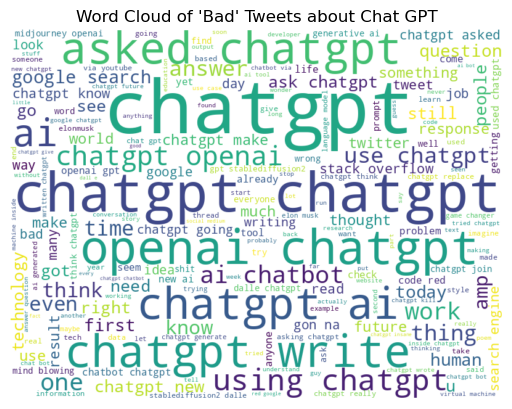

In [44]:
badwordcloud=WordCloud(width=800, height=600, background_color='white',random_state=42).generate(bad_text)
plt.imshow(badwordcloud, interpolation='bilinear')
plt.title('Word Cloud of \'Bad\' Tweets about Chat GPT')
plt.axis('off')

- From the above bad tweets wordcloud, we found words sucha as 'bad', 'time', 'stack over flow', 'problem', 'midjourney', 'chatbot', 'search engine', 'wrong' were frequent in tweets that are labelled as bad. 

(-0.5, 799.5, 599.5, -0.5)

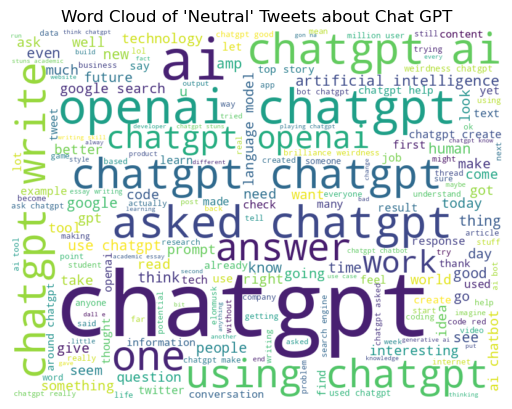

In [45]:
neutralwordcloud=WordCloud(width=800, height=600, background_color='white',random_state=42).generate(neutral_text)
plt.imshow(neutralwordcloud, interpolation='bilinear')
plt.title('Word Cloud of \'Neutral\' Tweets about Chat GPT')
plt.axis('off')

- The Neutral words wordcloud mostly made up of 'conversation', 'tech', 'idea', find job', 'google', content', 'read', 'work', 'time', 'technology' etc.,

Text(0.5, 1.0, 'Distribution of Various Label Categories')

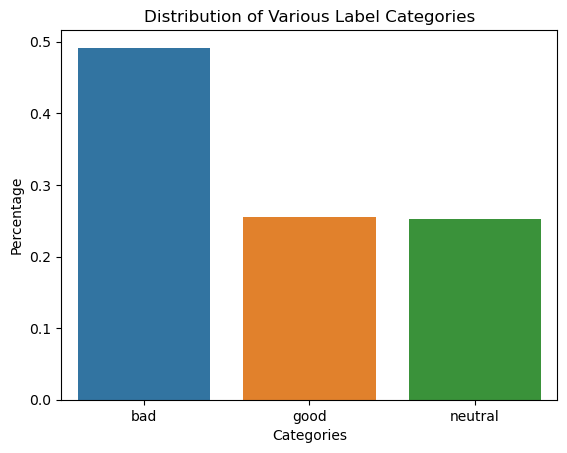

In [22]:
label_counts=data1.labels.value_counts(normalize=True)
sns.barplot(x=label_counts.index,y=label_counts.values)
plt.ylabel('Percentage')
plt.xlabel('Categories')
plt.title('Distribution of Various Label Categories')

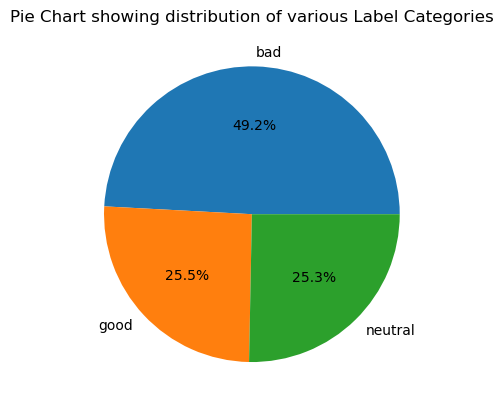

In [42]:
plt.pie(label_counts,labels=label_counts.index,autopct='%1.1f%%')
plt.title('Pie Chart showing distribution of various Label Categories')
plt.show()

- Approximately 50% of tweets are falling under 'bad' label category.
- 25 % under 'good' label category
- 25 % under 'neutral' label category

- Clearly, we can see Data Imblanace in dataset. As we have plenty of data points, we could use Under Sampling for handling the data imbalance during model training.

### Sentiment Scores:

#### Subjectivity:

- Using TextBlob, Subjectivity and Polarity Scores were obtained.
- 'Subjectivity' scores ranging from 0 to 1 signify how tweets are embedded with personal views or opinions.
- Subjectivity Score '1' signifies text with personal feelings, opinions and emotions.
- Subjectivity Score '0' signifies text with completely objective words (no personal opinion or feelings or emotions)

#### Polarity:

- 'Polarity' scores ranging from -1 to 1 signifies how positive or negative are tweets.
- 'Polarity' score of 1 indicates 'Positive' Sentiment or Emotion.
- 'Polarity' score of 0 indicates 'Neutral' Sentiment or Emotion.
- 'Polarity' score of -1 indicates 'Negative' Sentiment or Emotion.

In [24]:
# Functions for getting Subjectivity and Polarity score using TextBlob
def textsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def textpolarity(text):
    return TextBlob(text).sentiment.polarity

In [25]:
data1['subjectivity']=data1['cleaned_text'].progress_apply(lambda x:textsubjectivity(x))
data1['polarity']=data1['cleaned_text'].progress_apply(lambda x:textpolarity(x))

100%|██████████| 219294/219294 [00:56<00:00, 3893.38it/s]


In [26]:
data1.head()

,Unnamed: 0,tweets,labels,cleaned_text,subjectivity,polarity
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language model dialogue openai,0.000000,0.000000
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking chatgpt new ai system optimized dialogue feedback help u improve,0.454545,0.136364
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language model dialogue ai machinelearning datascience artificialintelligence trending ai ml article identified amp digested via granola machine driven r bot ramsey elbasheer,0.000000,0.000000
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled share chatgpt new model optimized dialog public free accessible everyone,0.479242,0.302273
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,2 minute ago openai released new chatgpt use right,0.495130,0.211039


Text(0.5, 1.0, 'Box plot of Subjectivity Scores of Good, Bad, Neutral Categories')

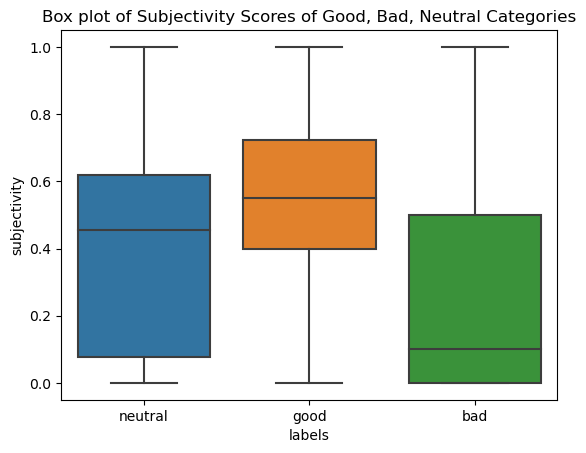

In [27]:
sns.boxplot(x='labels',y='subjectivity',data=data1)
plt.title('Box plot of Subjectivity Scores of Good, Bad, Neutral Categories')

- Subjectivity Score > 0.5 is generally considered as text interspersed with personal feelings, emotions or opinions.
- Subjectivity Score < 0.1 is considered as text with objective words (i.e., no personal feelings or opinions)
- Subjectivity Score in between them is considered as text with mixture of objective words and personal feelings.

From the above boxplot, we can see that:
* The median of Subjectivity score for'Neutral' Label category is around 0.43 (signifying that tweets consists of mixture of personal feelings and objective words)
* The median of Subjectivity score for 'Good' Label category is around 0.55 (signifying that tweets consists of Positive Opinion Words).
* The median of Subjectivity score for 'Bad' Label category is around 0.1 (signifying that tweets consists of Objective Words).

Text(0.5, 1.0, 'Box plot of Polarity Scores of Good, Bad, Neutral Categories')

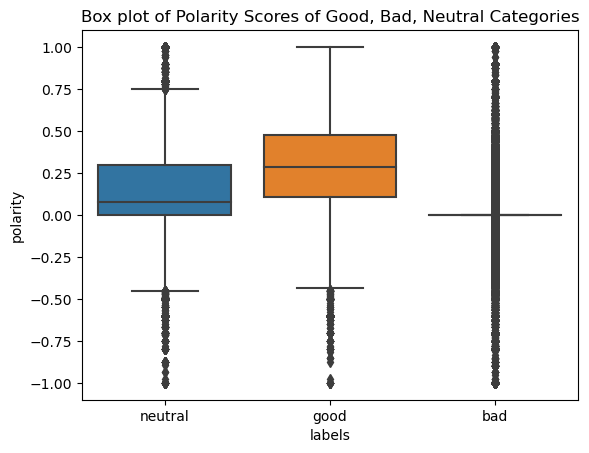

In [28]:
sns.boxplot(x='labels',y='polarity',data=data1)
plt.title('Box plot of Polarity Scores of Good, Bad, Neutral Categories')

- Polarity Score of -1 signifies 'Strong Negative Sentiment'
- Polarity Score of 0 signifies 'Neutral Sentiment (Neither bad nor good).
- Polarity Score of 1 signifies 'Strong Positive Sentiment'.

From the above Polarity Score boxplot, we can see that:
* The median score for 'Neutral' label category is around 0, indicating 'Neutral Sentiment'
* The median score for 'Good' label category is around 0.2, indicating 'Weak Positive Sentiment'
* The median score for 'Bad' label category is around 0.

* The interesting thing here is for 'Bad' label category. There are so many outliers present in it.
* These outliers consists of both positive sentiment value (reaching to +1) and negative sentiment value (reaching to -1).
* This signifies that tweets which are labeled as 'bad' might have some positive sentiment words present in it. The underlying meaning of these tweets might have been sarcastic or of good opinion.

In [29]:
data1[data1.labels=='bad'].head(20)

,Unnamed: 0,tweets,labels,cleaned_text,subjectivity,polarity
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,2 minute ago openai released new chatgpt use right,0.495130,0.211039
6,6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",bad,2 minute ago openai released new chatgpt use right,0.495130,0.211039
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,bad,god damn openai stop announcing thing busy,0.300000,0.100000
17,17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",bad,ai model set become search engine future atm still struggle veracity… chatgpt openai based gpt3 seo,0.125000,0.000000
39,39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,bad,google done compare quality response ( chatgpt ),0.000000,0.000000
45,45,ChatGPT vs. riddles https://t.co/YuPYOD0U7o,bad,chatgpt v riddle,0.000000,0.000000
46,46,OpenAI's ChatGPT is available to test on https://t.co/MM62zDEtWO\n\nLet's give this a try with some of the hardest questions known to humans. https://t.co/z9iXmooOLX,bad,openai chatgpt available test give try hardest question known human,0.250000,0.200000
47,47,Asked ChatGPT to write a Telugu song about cereal and it mixed milk with chicken masala 🥲 https://t.co/TpEp8wa6Lk https://t.co/oHM9z7IS39,bad,asked chatgpt write telugu song cereal mixed milk chicken masala,0.600000,-0.300000
50,50,I just spent a bunch of time discussing different organizational models with @OpenAI's new ChatGPT. Incredible. https://t.co/HcRhZxtnI3,bad,spent bunch time discussing different organizational model openai new chatgpt incredible,0.513636,0.234091
52,52,ChatGPT thwarts my many attempts at malicious JavaScript injections https://t.co/jXkC9ojUwy,bad,chatgpt thwart many attempt malicious javascript injection,0.500000,0.500000


When we see the first 20 tweets which are labelled as 'bad', We can notice following:
* People are sharing their experiences or experiments with Chat GPT.
* Poeple are surprised over the results they got while experimenting with Chat GPT. Their reactions include words like 'damn', 'dope', 'wow' etc.,
* some of them are not necessarily bad tweets.

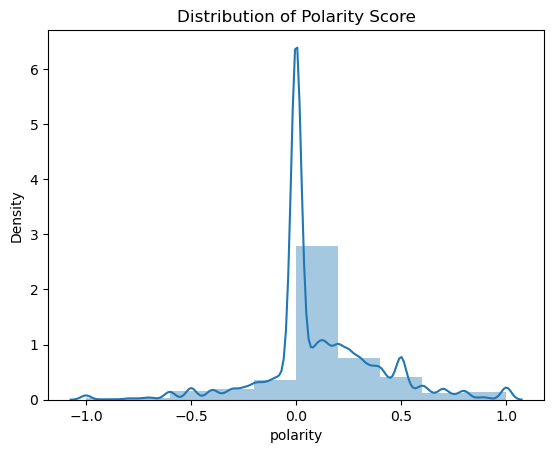

In [30]:
sns.distplot(data1['polarity'],bins=10)
plt.title('Distribution of Polarity Score')
plt.show()

- The distribution of polarit score indicates a peak at score 0 (Neutral Sentiment)

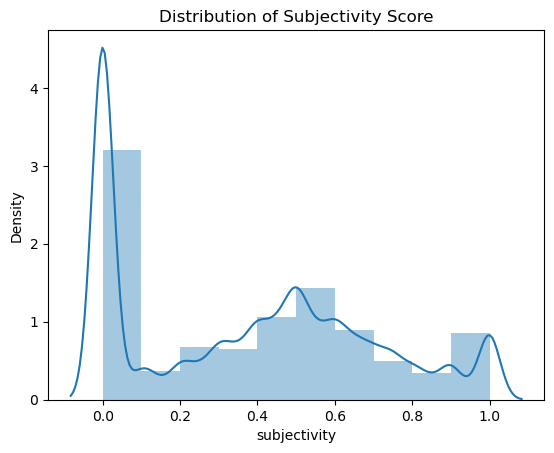

In [31]:
sns.distplot(data1['subjectivity'],bins=10)
plt.title('Distribution of Subjectivity Score')
plt.show()

- The distribution of Subjectivity score has 3 modal peaks.
- One is occuring at score value 0, indicating 'Objective Words' in text.
- Second peak is occuring at score value 0.5 indicating mixture 'Objective Words' and 'Personal feeling or opinions'.
- Third peak is occuring at score value of 1 indicating strong 'Personal feelings or Opinions' in tweets.

Text(0.5, 1.0, 'Subjectivity Vs Polarity')

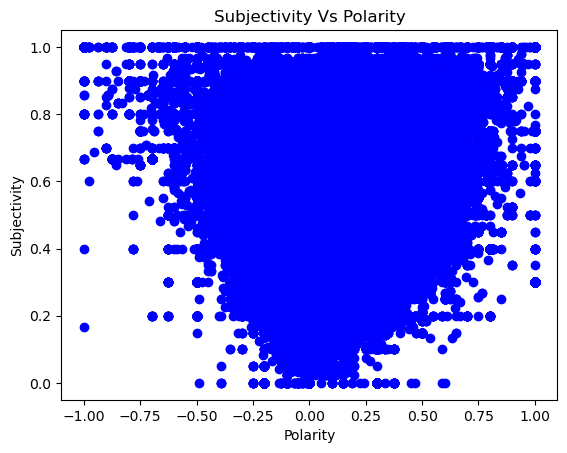

In [32]:
# Scatter Plot of Subjectivity vs Polarity score
plt.scatter(data1.polarity,data1.subjectivity,color='blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Vs Polarity')

- We can see a funnel like shape in the above graph.
- As the subjective score is increasing, the polarity score deviation is also increasing.
- Thus, More Subjective the score is, more is diversity in polarity score.

Text(0.5, 1.0, 'Subjectivity Vs Polarity')

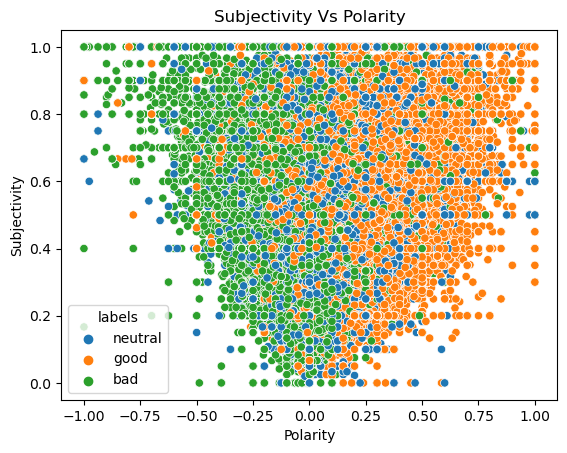

In [190]:
# Scatter Plot of Subjectivity vs Polarity score
sns.scatterplot(x='polarity',y='subjectivity',data=data1,hue='labels')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Vs Polarity')

In [191]:
data_good=data1[data1.labels=='good']
data_bad=data1[data1.labels=='bad']
data_neutral=data1[data1.labels=='neutral']

Text(0.5, 1.0, 'Subjectivity Vs Polarity of Good Tweets')

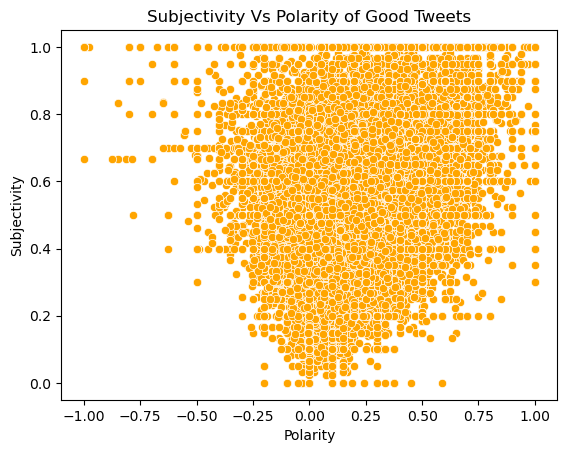

In [196]:
# Scatter Plot of Subjectivity vs Polarity score
sns.scatterplot(x='polarity',y='subjectivity',data=data_good,color='orange')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Vs Polarity of Good Tweets')

- Most of the labelled 'Good' tweets are showing positive sentiment (reflected by Polarity Score >0). 

Text(0.5, 1.0, 'Subjectivity Vs Polarity of Bad Tweets')

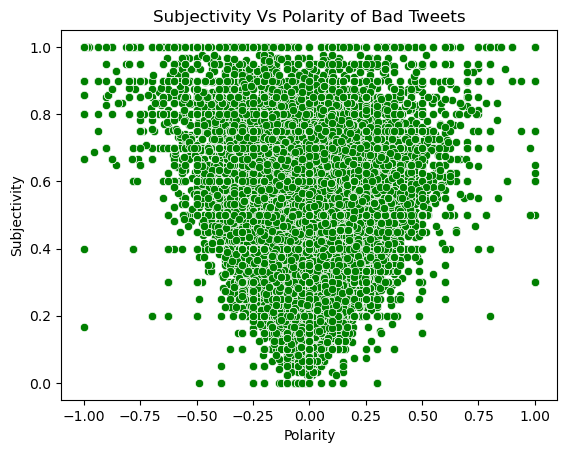

In [198]:
# Scatter Plot of Subjectivity vs Polarity score
sns.scatterplot(x='polarity',y='subjectivity',data=data_bad,color='green')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Vs Polarity of Bad Tweets')

- The funnel shape can be seen in case of 'bad' tweets.
- It signifies lot of deviation in polarity scores as their subjectivity score increases.
- This could be due to misclassification of tweets as bad or some of the bad tweets were sarcastic.

Text(0.5, 1.0, 'Subjectivity Vs Polarity of Neutral Tweets')

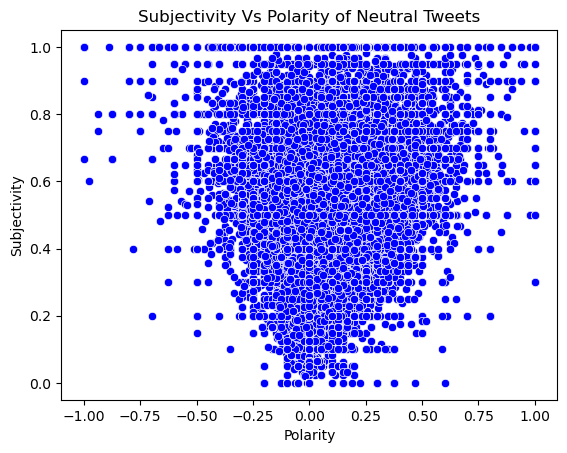

In [199]:
# Scatter Plot of Subjectivity vs Polarity score
sns.scatterplot(x='polarity',y='subjectivity',data=data_neutral,color='blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Subjectivity Vs Polarity of Neutral Tweets')

- The 'Neutral' tweets are showing positive sentiment as the subjectivity score increases to 1.

In [33]:
def labels(label):
    if label == 'good':
        label=2
    elif label == 'neutral':
        label=1
    elif label == 'bad':
        label=0
    return label

In [34]:
data1['category']=data1['labels'].apply(lambda x:labels(x))
data1.head()

,Unnamed: 0,tweets,labels,cleaned_text,subjectivity,polarity,category
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language model dialogue openai,0.000000,0.000000,1
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking chatgpt new ai system optimized dialogue feedback help u improve,0.454545,0.136364,2
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language model dialogue ai machinelearning datascience artificialintelligence trending ai ml article identified amp digested via granola machine driven r bot ramsey elbasheer,0.000000,0.000000,1
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled share chatgpt new model optimized dialog public free accessible everyone,0.479242,0.302273,2
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,2 minute ago openai released new chatgpt use right,0.495130,0.211039,0


### Model Training:

#### Train Test Split Data:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data1['cleaned_text'],data1['category'],train_size=0.7, random_state=42)

#### Handling Imbalance:

Since the data is imbalanced and we have plenty of datapoints, we can undersample data to handle imbalanace.
NOTE:
We have to perform undersampling only on train dataset not on test dataset.

In [67]:
under_sample=RandomUnderSampler(random_state=42)

In [68]:
X_train_us, y_train_us = under_sample.fit_resample(pd.DataFrame(X_train), y_train) #for undersampling, a 2d shape data has to be passed incase of X_train

In [69]:
print('The length of X_train sample before under sampling:', len(X_train))
print('The length of X_train sample after under sampling:', len(X_train_us))

The length of X_train sample before under sampling: 153505
The length of X_train sample after under sampling: 116301


In [70]:
print('The value counts of category in y_train before under sampling: \n',y_train.value_counts() )
print('The value counts of category in y_train after under sampling: \n', y_train_us.value_counts())

The value counts of category in y_train before under sampling: 
 0    75503
2    39235
1    38767
Name: category, dtype: int64
The value counts of category in y_train after under sampling: 
 0    38767
1    38767
2    38767
Name: category, dtype: int64


In [72]:
X_train_us_tfidf=tfidfvect.fit_transform(X_train_us['cleaned_text']) 
X_test_tfidf=tfidfvect.transform(X_test)

- We only transform the test data. No need to fit and transform the test dataset.

In [73]:
len(X_train_us)
len(y_train_us)

116301

#### Bag of Words:

In [185]:
X_train_us_tfidf_table=pd.DataFrame(data=X_train_us_tfidf.toarray(),columns=tfidfvect.get_feature_names_out())
X_train_us_tfidf_table.head()

,00,000,0000,00000000001,0000000001,00000001,000001,00001,0003,000s,...,𝙨𝙤,𝙨𝙪𝙥𝙥𝙤𝙧𝙩𝙚𝙙,𝙬𝙞𝙩𝙝,𝚊𝚛𝚝𝚒𝚏𝚒𝚌𝚒𝚊𝚕,𝚒𝚗𝚝𝚎𝚕𝚕𝚒𝚐𝚎𝚗𝚌𝚎,𝚒𝚗𝚝𝚎𝚛𝚟𝚒𝚎𝚠𝚎𝚍,𝟏𝟎𝟎,𝟭𝟬,𝟮𝗧𝗨𝗥𝗡,𝟮𝟬𝟮𝟯
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression:

In [74]:
model1=LogisticRegression()

In [75]:
lm=model1.fit(X_train_us_tfidf,y_train_us)

In [76]:
y_pred=lm.predict(X_test_tfidf)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     32293
           1       0.69      0.73      0.71     16720
           2       0.82      0.82      0.82     16776

    accuracy                           0.83     65789
   macro avg       0.81      0.81      0.81     65789
weighted avg       0.83      0.83      0.83     65789



### Decision Tree:

In [79]:
model2=DecisionTreeClassifier(random_state=42)

In [80]:
dtc=model2.fit(X_train_us_tfidf,y_train_us)

In [82]:
y_pred_dtc=dtc.predict(X_test_tfidf)

In [83]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     32293
           1       0.58      0.68      0.63     16720
           2       0.69      0.69      0.69     16776

    accuracy                           0.75     65789
   macro avg       0.72      0.73      0.73     65789
weighted avg       0.77      0.75      0.76     65789



### Random Forest Classifier:

In [116]:
model3=RandomForestClassifier(random_state=42,n_jobs=-1)

In [120]:
params={'max_depth':[1,2,5,10,20],
       'min_samples_leaf':[5,10,20,50],
       'max_features':[2,3,4],
       'n_estimators':[10,30,50]}

In [121]:
grid_search=GridSearchCV(estimator=model3,param_grid=params,cv=4,verbose=1,n_jobs=-1,scoring='accuracy')

In [122]:
%%time
grid_search.fit(X_train_us_tfidf,y_train_us)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 5.09 s, sys: 1.27 s, total: 6.36 s
Wall time: 2min 41s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 30, 50]},
             scoring='accuracy', verbose=1)

In [124]:
rfc_best=grid_search.best_estimator_
rfc_best

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [155]:
model4=RandomForestClassifier(random_state=42,max_depth=10,n_estimators=50,n_jobs=-1)

In [156]:
rfcbest=model4.fit(X_train_us_tfidf,y_train_us)

In [157]:
y_pred_rfc=rfcbest.predict(X_test_tfidf)

In [158]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77     32293
           1       0.52      0.27      0.35     16720
           2       0.61      0.67      0.64     16776

    accuracy                           0.65     65789
   macro avg       0.61      0.60      0.59     65789
weighted avg       0.63      0.65      0.63     65789



### Accuracies of Models:

In [170]:
accuracy_lr=round(accuracy_score(y_test,y_pred),2)
accuracy_dtc=round(accuracy_score(y_test,y_pred_dtc),2)
accuracy_rfc=round(accuracy_score(y_test,y_pred_rfc),2)

In [172]:
accuracies=[accuracy_lr,accuracy_dtc,accuracy_rfc]
models=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier']

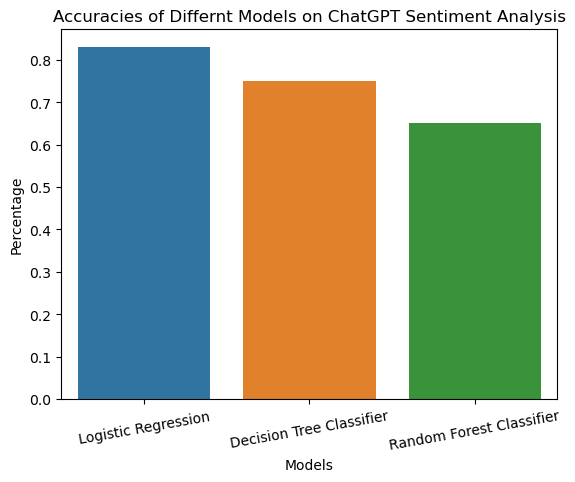

In [179]:
sns.barplot(x=models,y=accuracies)
plt.title('Accuracies of Differnt Models on ChatGPT Sentiment Analysis')
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.xticks(rotation=10)
plt.show()

- The Logistic Regression Model is the best performing model with 83% accuracy.